# Downloading data

Download license plate images and corresponding annotations in xml files in PASCAL VOC format from kaggle using the below given commands.

First install opendatasets

In [ ]:
!pip install opendatasets

On executing the below code, it would ask for Kaggle username and key. Go to Kaggle's homepage, "Account" subsection of the "My Profile" section and click the button "Create New API Token". This will give "kaggle.json" file. Enter the username and key in the prompt that appears and downloading will start. This will create a folder named "car-plate-detection" with subfolders "images" and "annotations". "images" folder contains images in jpg format. "annotations" folder contains xml files in PASCAL VOC format.

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/andrewmvd/car-plate-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle Key:Downloading car-plate-detection.zip to ./car-plate-detection


100%|██████████| 203M/203M [06:03<00:00, 586kB/s]  


The below steps divide the data in car-plate-detection folder in train, test and val folders.

In [3]:
import shutil
import os
src = r"car-plate-detection/images/"
src_annotations = r"car-plate-detection/annotations/"  

dirTest = 'data/test/'
if not os.path.exists(dirTest):
    os.makedirs(dirTest+"images")
    os.makedirs(dirTest+"annotations")

dirTest = 'data/train/'
if not os.path.exists(dirTest):
    os.makedirs(dirTest+"images")
    os.makedirs(dirTest+"annotations")

dirTest = 'data/val/'
if not os.path.exists(dirTest):
    os.makedirs(dirTest+"images")
    os.makedirs(dirTest+"annotations")


dst_test = r'data/test/images/'  
dst_train = r'data/train/images/'  
dst_val = r'data/val/images/'  
dst_test_annotations = r'data/test/annotations/'  
dst_train_annotations = r'data/train/annotations/'  
dst_val_annotations = r'data/val/annotations/'  

files = os.listdir(src)
for file in files[:len(files)//3]:    
    file_name = os.path.splitext(file)[0]
    print(src + file_name +".png")
    print(dst_train + file_name +".png")
    shutil.move(src + file_name +".png", dst_train + file_name +".png")
    shutil.move(src_annotations + file_name +".xml", dst_train_annotations + file_name +".xml")

files = os.listdir(src)
for file in files[:len(files)//2]:
    file_name = os.path.splitext(file)[0]
    shutil.move(src + file_name +".png", dst_test + file_name +".png")
    shutil.move(src_annotations + file_name +".xml", dst_test_annotations + file_name +".xml")

files = os.listdir(src)
for file in files:
    file_name = os.path.splitext(file)[0]
    shutil.move(src + file_name +".png", dst_val + file_name +".png")
    shutil.move(src_annotations + file_name +".xml", dst_val_annotations + file_name +".xml")


car-plate-detection/images/Cars207.png
data/train/images/Cars207.png
car-plate-detection/images/Cars213.png
data/train/images/Cars213.png
car-plate-detection/images/Cars53.png
data/train/images/Cars53.png
car-plate-detection/images/Cars47.png
data/train/images/Cars47.png
car-plate-detection/images/Cars90.png
data/train/images/Cars90.png
car-plate-detection/images/Cars159.png
data/train/images/Cars159.png
car-plate-detection/images/Cars84.png
data/train/images/Cars84.png
car-plate-detection/images/Cars171.png
data/train/images/Cars171.png
car-plate-detection/images/Cars165.png
data/train/images/Cars165.png
car-plate-detection/images/Cars398.png
data/train/images/Cars398.png
car-plate-detection/images/Cars429.png
data/train/images/Cars429.png
car-plate-detection/images/Cars373.png
data/train/images/Cars373.png
car-plate-detection/images/Cars415.png
data/train/images/Cars415.png
car-plate-detection/images/Cars401.png
data/train/images/Cars401.png
car-plate-detection/images/Cars367.png
dat

Creates a sub-directory called labels in each sub-folder (train, test, val). It converts the annotations in xml format to yolo readable format, which it stores in txt file for each image in labels folder. Change the input_dir, output_dir, image_dir for test and val folders accordingly. 

In [4]:
import xml.etree.ElementTree as ET
import glob
import os
import json


def xml_to_yolo_bbox(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]


def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center width heigth
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]


dict = ["train","test","val"]

for item in dict:
    classes = []
    input_dir = "data/"+item+"/annotations/"
    output_dir = "data/"+item+"/labels/"
    image_dir = "data/"+item+"/images/"

    # create the labels folder (output directory)
    os.mkdir(output_dir)

    # identify all the xml files in the annotations folder (input directory)
    files = glob.glob(os.path.join(input_dir, '*.xml'))
    # loop through each 
    for fil in files:
        basename = os.path.basename(fil)
        filename = os.path.splitext(basename)[0]
        # check if the label contains the corresponding image file
        if not os.path.exists(os.path.join(image_dir, f"{filename}.png")):
            print(f"{filename} image does not exist!")
            continue

        result = []

        # parse the content of the xml file
        tree = ET.parse(fil)
        root = tree.getroot()
        width = int(root.find("size").find("width").text)
        height = int(root.find("size").find("height").text)

        for obj in root.findall('object'):
            label = obj.find("name").text
            # check for new classes and append to list
            if label not in classes:
                classes.append(label)
            index = classes.index(label)
            pil_bbox = [int(x.text) for x in obj.find("bndbox")]
            yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
            # convert data to string
            bbox_string = " ".join([str(x) for x in yolo_bbox])
            result.append(f"{index} {bbox_string}")

        if result:
            # generate a YOLO format text file for each xml file
            with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding="utf-8") as f:
                f.write("\n".join(result))

    # generate the classes file as reference
    with open('classes.txt', 'w', encoding='utf8') as f:
        f.write(json.dumps(classes))


## Download YOLO

Download yolov5 using the below step.

In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12613, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 12613 (delta 95), reused 104 (delta 64), pack-reused 12467
Receiving objects: 100% (12613/12613), 12.77 MiB | 1.36 MiB/s, done.
Resolving deltas: 100% (8691/8691), done.


Go to yolov5/data folder and create license_plate.yaml file. Add the following contents.

In [6]:
%%writefile yolov5/data/license_plate.yaml
train: ../data/train/images/
test: ../data/test/images/
val: ../data/val/images/

# number of classes
nc: 1

# class names
names: ["license_plate"]

Writing yolov5/data/license_plate.yaml


## Training the model

Train Yolov5n based on the license plate data. Run the following command. You can also use other variants of yolo like yolo5m, yolo5s etc. You can also improve the efficiency of the model by increasing the number of epochs in the below given step

In [14]:
!python yolov5/train.py --img 640 --batch 32 --epochs 60 --data license_plate.yaml --weights yolov5n.pt 

train: weights=yolov5n.pt, cfg=, data=license_plate.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-149-g77dcf55 Python-3.9.6 torch-1.12.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.

You can check the output and the results by going to yolov5/runs/train. 

## Validating the data

Run the val.py file in yolov5 folder using the weights generated in yolov5/runs/train/exp/weights named best.pt. 

In [17]:
!python yolov5/val.py --weights yolov5/runs/train/exp/weights/best.pt --data yolov5/data/license_plate.yaml --img 640 --task test

val: data=yolov5/data/license_plate.yaml, weights=['yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-149-g77dcf55 Python-3.9.6 torch-1.12.1 CPU

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
test: Scanning '/Users/anu/Desktop/yolo/data/test/labels' images and labels...14
test: New cache created: /Users/anu/Desktop/yolo/data/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   
                   all        144        164      0.806      0.793      0.834      0.471
Speed: 6.6ms pre-process, 109.9ms inference, 0.7ms NMS per image at shape (32, 3, 640, 640)
Results saved to yolov5/runs/val/exp2


## Detection of the license-plates

It detects the license-plates in the images and forms the bounding boxes around the license-plates.

In [22]:
!python yolov5/detect.py --data yolov5/data/license_plate.yaml --weights yolov5/runs/train/exp/weights/best.pt --source data/test/images/

detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=data/test/images/, data=yolov5/data/license_plate.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-149-g77dcf55 Python-3.9.6 torch-1.12.1 CPU

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/144 /Users/anu/Desktop/yolo/data/test/images/Cars0.png: 352x640 1 license_plate, 65.5ms
image 2/144 /Users/anu/Desktop/yolo/data/test/images/Cars1.png: 416x640 1 license_plate, 75.4ms
image 3/144 /Users/anu/Desktop/yolo/data/test/images/Cars10.png: 384x640 (no detections), 67.7ms
image 4/144 /Users/anu/Desktop/yolo/data/test/images/Cars100.png

## Visualization of the images with bounding boxes

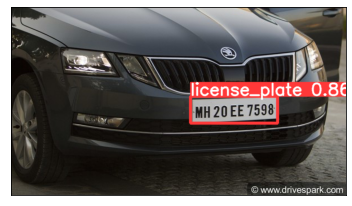

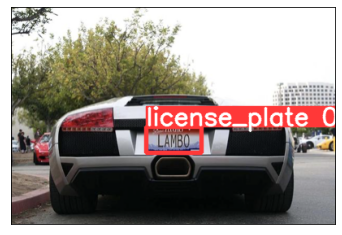

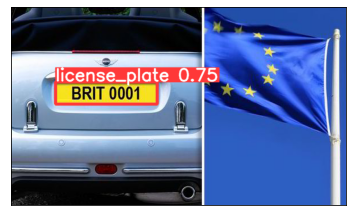

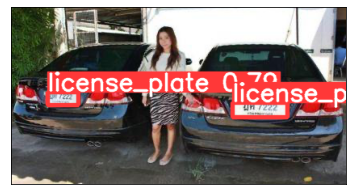

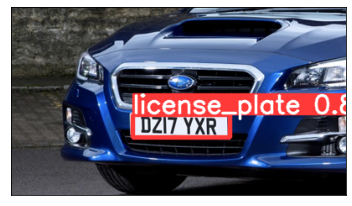

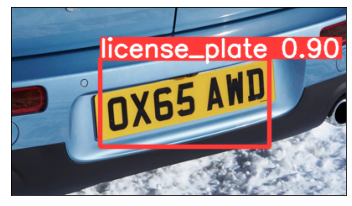

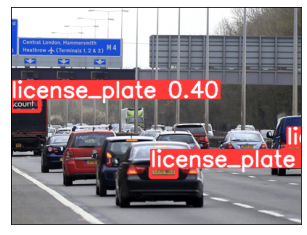

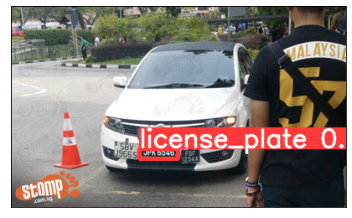

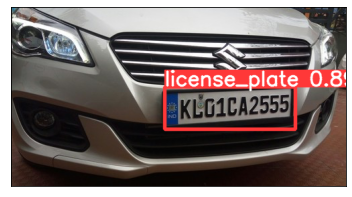

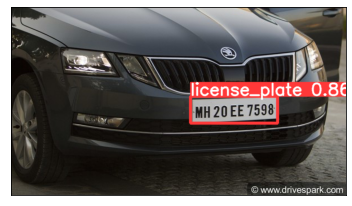

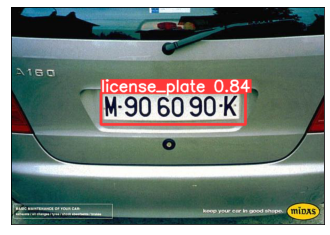

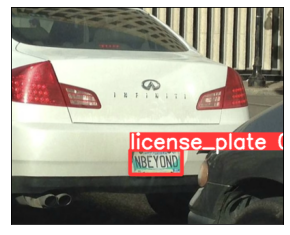

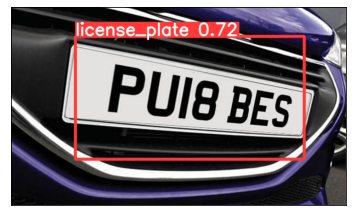

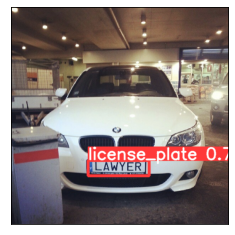

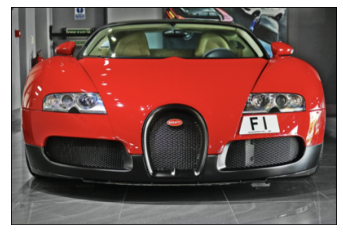

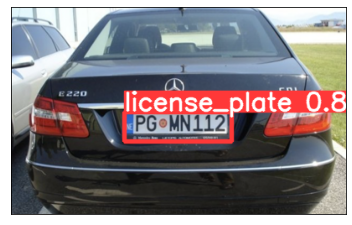

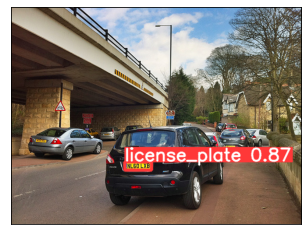

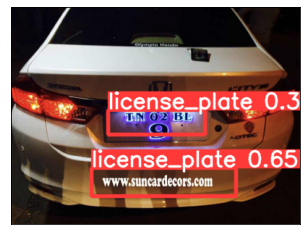

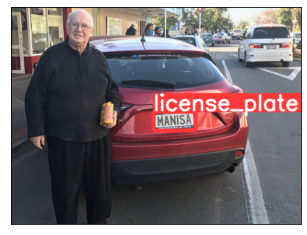

<Figure size 432x288 with 0 Axes>

In [33]:
# Visualize the images with bounding boxes

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob

# todo: change this to your folder accordingly
TEST_IMAGES_WITH_BB = "yolov5/runs/detect/exp5"

%matplotlib inline

glob_temp = glob.glob(os.path.join(TEST_IMAGES_WITH_BB, '*.png'))

images = []
for img_path in glob_temp:
    images.append(mpimg.imread(img_path))


for i, image in enumerate(images):
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.figure(i+1)
    if i+1==20:
        break
    

plt.show()